Code to recreate figure 2 of the [paper](http://www.sciencedirect.com/science/article/pii/S1463500317300136) with a polar projection instead of a Cartesian.

In [2]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io as sio

/home/ctroupin/Software/Python/Envs/Diva-python3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Data

We only need to have the .mat files generated by Matjaz.

In [3]:
datadir = "/home/ctroupin/Publis/Published/201606_Rissaga/"
figdir = "/home/ctroupin/Publis/Published/201606_Rissaga/figures/"
datafile = "SSH_data_OffCiutadella.mat"

We load the angles, speeds and maximal elevations from the file.<br>
To do later: add a loop on all the files.

In [4]:
mat_contents = sio.loadmat(os.path.join(datadir, datafile))
angles = np.unique(mat_contents['angles2'])
speeds = np.unique(mat_contents['speeds2'])
stationMaxElevs2 = mat_contents['stationMaxElevs2']

Construct the vectors (angles and radii) for the plots.<br>
In order to avoid losing information with pcolormesh, the vector are augmented. 

In [25]:
dangles = np.gradient(angles)[0]
angles2plot = np.arange(angles[0] + dangles/2., angles[-1], dangles)
angles2plot = np.insert(angles2plot, [0], 180.)
angles2plot = np.append(angles2plot, 270.)
dspeed = np.gradient(speeds)[0]
speeds2plot = np.arange(speeds[0] - dspeed/2., speeds[-1] + dspeed, dspeed)

# Make the plot

We add a scale factor and an offset to extend the *thickness* of the polar tiles in the plot.

In [96]:
def plot_dispersion_polar(angles, speeds, elevations, figname, factor=3., offset=55.):
    """Function to plot the Sea Surface Height according to the angle and 
    the velocity of the pressure wave.
    Inputs
    angles: numpy array storing the angles
    speeds: numpy array storing the velocities
    elevations: numpy ndarray storing the elevation
    figname: name of the figure to be saved
    
    Optional
    factor and offset: parameters to enlarge the region covered by the plot
    """
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_axes([0.05, 0.05, 0.95, 0.95], projection="polar")
    ax.spines['polar'].set_visible(False)
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location("N")

    pc = plt.pcolormesh(np.deg2rad(angles), speeds * factor - offset, np.flipud(elevations.T))

    lines, labels = plt.thetagrids(np.arange(angles.min(), angles.max() + .1, 10), 
                                   frac=1.07, fontsize=18)
    
    aa = range(int(np.floor(speeds.max())), int(np.floor(speeds.min())) - 1, -1)

    rlines, rlabels = plt.rgrids(np.arange(21.5, 37., 1) * factor - offset, 
                                 labels=range(int(np.floor(speeds.max())), int(np.floor(speeds.min())) - 1, -1), 
                                 angle=180, fontsize=18)

    print(aa)
    print('Speed min = {0}'.format(speeds.min()))
    plt.text(np.deg2rad(165.), 27, 'Pressure wave\nvelocity $U$ [m/s]', fontsize=20)
    plt.xlabel(r'Pressure wave propagation angle $\theta$', fontsize=20, horizontalalignment='right')

    cbaxes = fig.add_axes([0.05, 0.6, 0.6, 0.03]) 
    cbar = plt.colorbar(pc, cax = cbaxes, orientation='horizontal')
    cbar.ax.tick_params(axis='x',direction='in')
    cbar.ax.set_title('Maximum generated\nSSH anomaly [m]', fontsize=20)
    ccc = cbar.ax.get_xticklabels()
    cbar.ax.set_xticklabels(ccc, fontsize=14)
    plt.savefig(figname)
    plt.show()

    plt.close()

range(36, 19, -1)
Speed min = 20.5


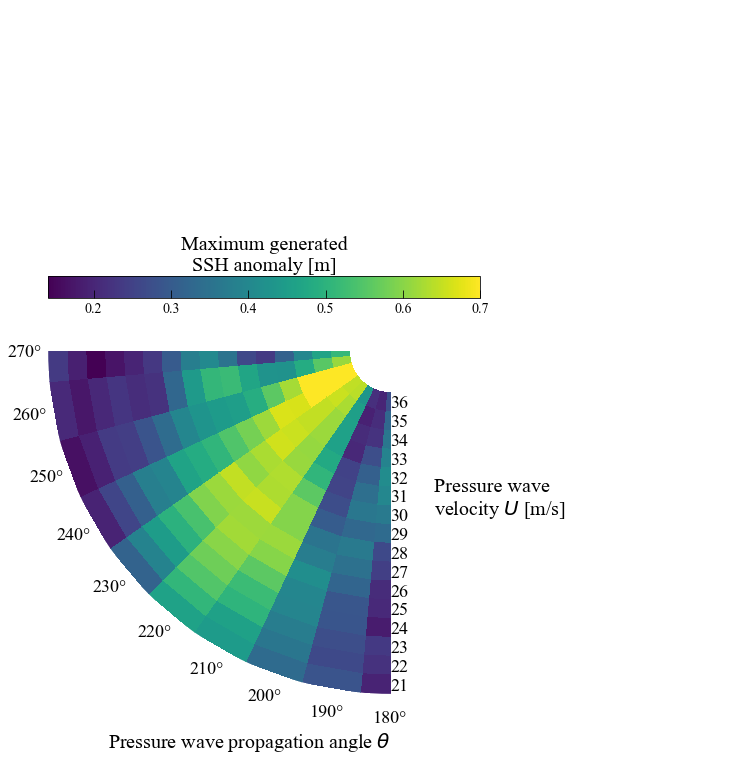

In [97]:
plot_dispersion_polar(angles2plot, speeds2plot, stationMaxElevs2, os.path.join(figdir, 'polarpcolor7.png'))